otsu thresholdig

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:

image_path = "CoverImages/baboon.tiff"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)



In [4]:
# Calculate histogram
hist, bins = np.histogram(image, bins=256, range=[0, 256])
total_pixels = image.shape[0] * image.shape[1]


In [5]:
max_variance = 0
best_threshold = 0

In [6]:

for threshold in range(256):
    p1 = np.sum(hist[:threshold]) / total_pixels
    p2 = np.sum(hist[threshold:]) / total_pixels

    #means
    m1 = np.sum(np.arange(threshold) * hist[:threshold]) / (p1 * total_pixels)
    m2 = np.sum(np.arange(threshold, 256) * hist[threshold:]) / (p2 * total_pixels)

    #class variance
    variance = p1 * p2 * (m1 - m2) ** 2
    if variance > max_variance:
        max_variance = variance
        best_threshold = threshold

#thresholding
binary_image = (image > best_threshold).astype(np.uint8) * 255


C:\Users\User\AppData\Local\Temp\ipykernel_6104\1206899504.py:6: RuntimeWarning: invalid value encountered in scalar divide
  m1 = np.sum(np.arange(threshold) * hist[:threshold]) / (p1 * total_pixels)
C:\Users\User\AppData\Local\Temp\ipykernel_6104\1206899504.py:7: RuntimeWarning: invalid value encountered in scalar divide
  m2 = np.sum(np.arange(threshold, 256) * hist[threshold:]) / (p2 * total_pixels)


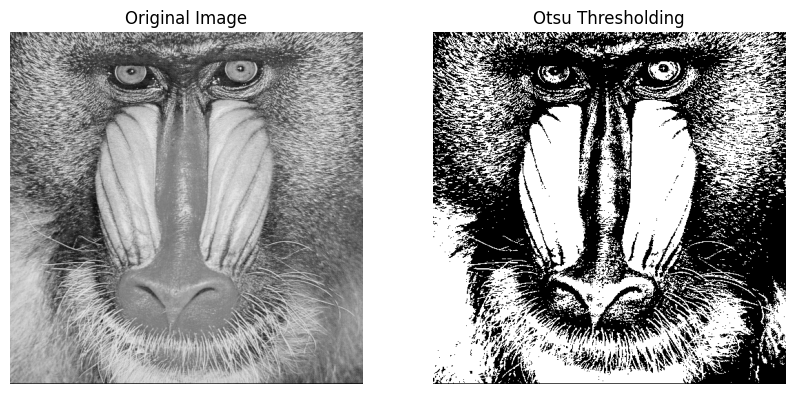

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title("Otsu Thresholding")
plt.axis('off')

plt.show()